In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = InteractiveSession(config=config)

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [5]:
model1 = keras.Sequential()

In [6]:
model1.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model1.fit(x_train, y_train, batch_size=500, epochs=15)

Epoch 1/15
120/120 [==============================] - 1s 10ms/step - loss: 0.6443 - accuracy: 0.7678
Epoch 2/15
120/120 [==============================] - 1s 10ms/step - loss: 0.3817 - accuracy: 0.8642
Epoch 3/15
120/120 [==============================] - 1s 10ms/step - loss: 0.3232 - accuracy: 0.8844
Epoch 4/15
120/120 [==============================] - 1s 10ms/step - loss: 0.2877 - accuracy: 0.8960
Epoch 5/15
120/120 [==============================] - 1s 10ms/step - loss: 0.2668 - accuracy: 0.9048
Epoch 6/15
120/120 [==============================] - 1s 11ms/step - loss: 0.2512 - accuracy: 0.9098
Epoch 7/15
120/120 [==============================] - 1s 10ms/step - loss: 0.2379 - accuracy: 0.9142
Epoch 8/15
120/120 [==============================] - 1s 10ms/step - loss: 0.2214 - accuracy: 0.9205
Epoch 9/15
120/120 [==============================] - 1s 10ms/step - loss: 0.2077 - accuracy: 0.9250
Epoch 10/15
120/120 [==============================] - 1s 10ms/step - loss: 0.1959 - accura

In [9]:
y_predict = model1.predict(x_test)

In [10]:
y_predict.shape

(10000, 10)

In [11]:
y_test.shape

(10000,)

In [12]:
y_predict = y_predict.argmax(axis=1)

In [13]:
miss = np.where(y_test != y_predict)[0]
miss

array([  12,   17,   23,   25,   40,   42,   68,   89,   98,  147,  150,
        153,  192,  239,  241,  244,  248,  271,  285,  316,  324,  325,
        378,  381,  382,  404,  410,  441,  444,  452,  457,  460,  474,
        510,  541,  548,  558,  560,  569,  570,  572,  586,  607,  634,
        635,  637,  659,  670,  674,  681,  688,  702,  711,  722,  732,
        753,  760,  764,  787,  801,  823,  851,  881,  893,  894,  902,
        905,  909,  921,  930,  935,  937,  938,  956,  960,  965,  966,
        976,  977,  979,  984,  994, 1000, 1005, 1025, 1055, 1064, 1111,
       1124, 1131, 1139, 1142, 1158, 1162, 1165, 1174, 1197, 1218, 1223,
       1231, 1254, 1280, 1294, 1297, 1300, 1305, 1312, 1326, 1329, 1336,
       1356, 1387, 1399, 1408, 1425, 1449, 1462, 1469, 1487, 1496, 1502,
       1522, 1533, 1543, 1572, 1586, 1596, 1617, 1620, 1632, 1642, 1643,
       1645, 1650, 1665, 1686, 1721, 1731, 1736, 1743, 1744, 1771, 1777,
       1810, 1822, 1826, 1833, 1836, 1846, 1879, 19

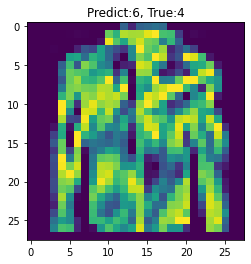

In [14]:
plt.imshow(x_test[17])
plt.title("Predict:{}, True:{}".format(y_predict[17], y_test[17]))
plt.show()

In [15]:
set(y_train) # label의 갯수 확인

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# CNN 계산과정 확인

In [16]:
from tensorflow.keras import models

In [17]:
model1.layers

In [18]:
model1.layers[0].output

<tf.Tensor 'conv2d/Relu_1:0' shape=(None, 28, 28, 64) dtype=float32>

In [19]:
layer_outputs = [layer.output for layer in model1.layers[:4]]
layer_outputs

[<tf.Tensor 'conv2d/Relu_1:0' shape=(None, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool_1:0' shape=(None, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu_1:0' shape=(None, 12, 12, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool_1:0' shape=(None, 6, 6, 128) dtype=float32>]

In [20]:
activation_model_mnist = models.Model(inputs=model1.input, outputs=layer_outputs)

In [21]:
activation_model_mnist

In [22]:
image1 = np.expand_dims(x_train[2], 0)
image1.shape

(1, 28, 28, 1)

In [23]:
activations = activation_model_mnist.predict(image1)

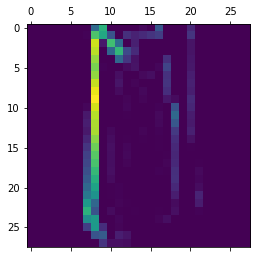

In [24]:
plt.matshow(activations[0][0,:,:,0])

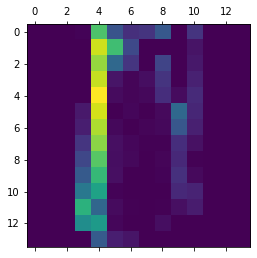

In [25]:
plt.matshow(activations[1][0,:,:,0])

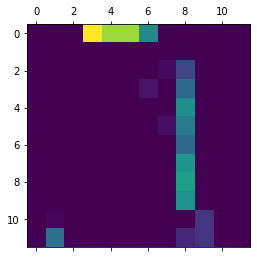

In [26]:
plt.matshow(activations[2][0,:,:,0])

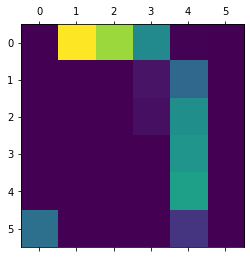

In [27]:
plt.matshow(activations[3][0,:,:,0])

In [28]:
len(activations[0][0,:,:])

28

In [29]:
'''
for i in range(len(activations[0][0,:,:])):
    plt.matshow(activations[0][0,:,:,i])
    plt.show()'''

'\nfor i in range(len(activations[0][0,:,:])):\n    plt.matshow(activations[0][0,:,:,i])\n    plt.show()'

In [30]:
a = ['a', 'b']
b = [1, 2]
for i,j in zip(a,b):
    print(i, j)

a 1
b 2


In [31]:
print(model1.layers[0].name)
print(model1.layers[1].name)
print(model1.layers[2].name)
print(model1.layers[3].name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1


In [32]:
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)

(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12, 12, 128)
(1, 6, 6, 128)


C:\Users\morning\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


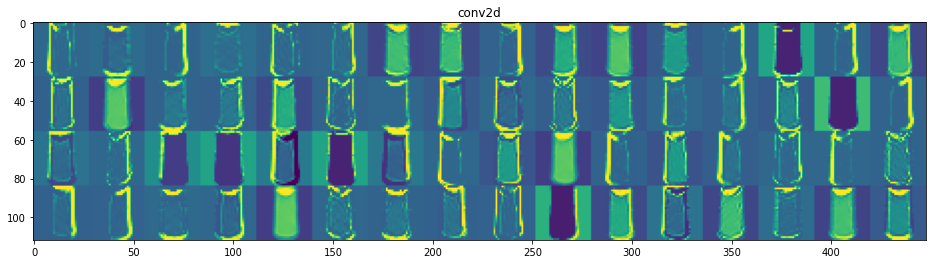

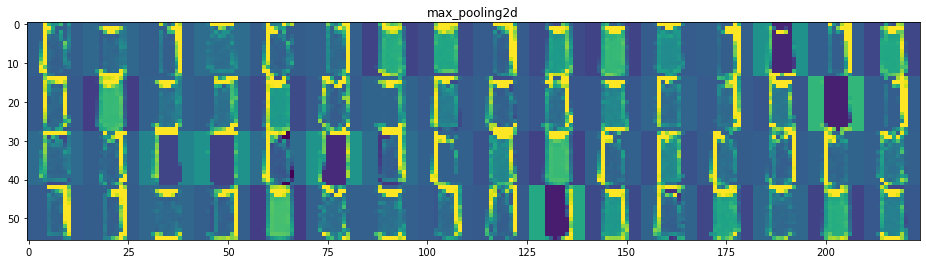

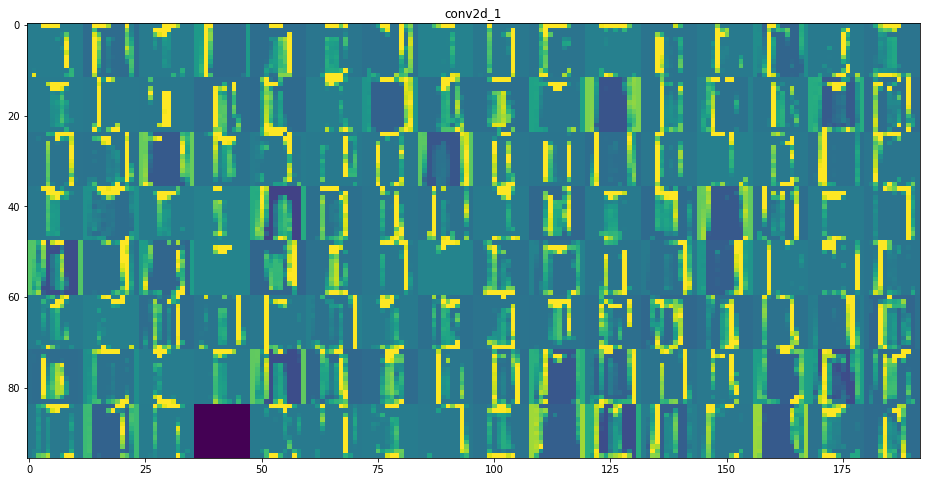

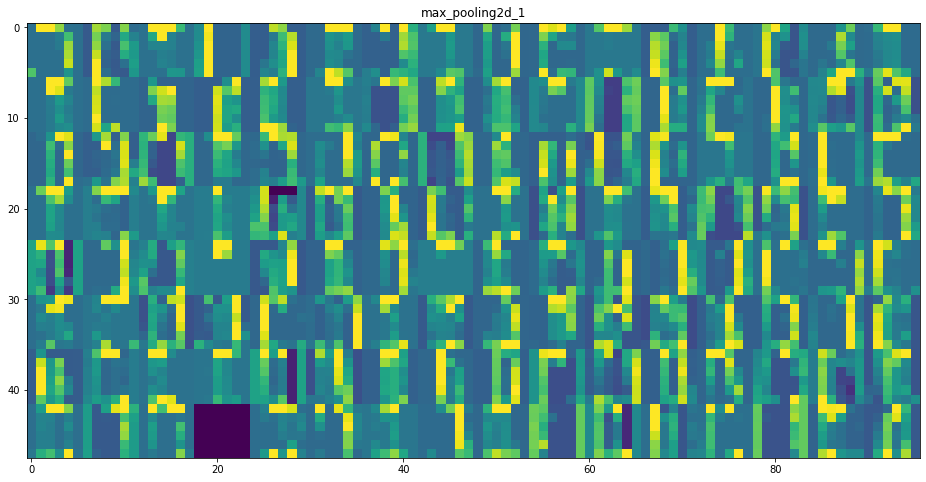

In [33]:
# 층의 이름을 그래프 제목으로 사용
layer_names = []
for layer in model1.layers[:4]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그림
for layer_name, layer_activation in zip(layer_names, activations):
    # activations = activation_model_mnist.predict(image1)
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]
    
    # 특성 맵의 크기는 (1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # 활성화 채널을 위한 그리드 크기를 구한다.
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # 각 활성화를 하나의 큰 그리드에 채운다.
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리한다.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
        
    # 그리드를 출력한다.
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# 경사상승법 참고사이트
- https://subinium.github.io/Keras-5-2/
- https://research.sualab.com/introduction/2019/10/23/interpretable-machine-learning-overview-2.html